<a href="https://colab.research.google.com/github/eminosman06/KalpHastalikTespit/blob/main/VeriMadenciligiProje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Veri Yükleme Aşaması:

Eksik değer sayıları:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Veri boyutu: (303, 13)
Özellikler: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Sınıf dağılımı:
target
0    164
1    139
Name: count, dtype: int64

Veri özeti:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.0000

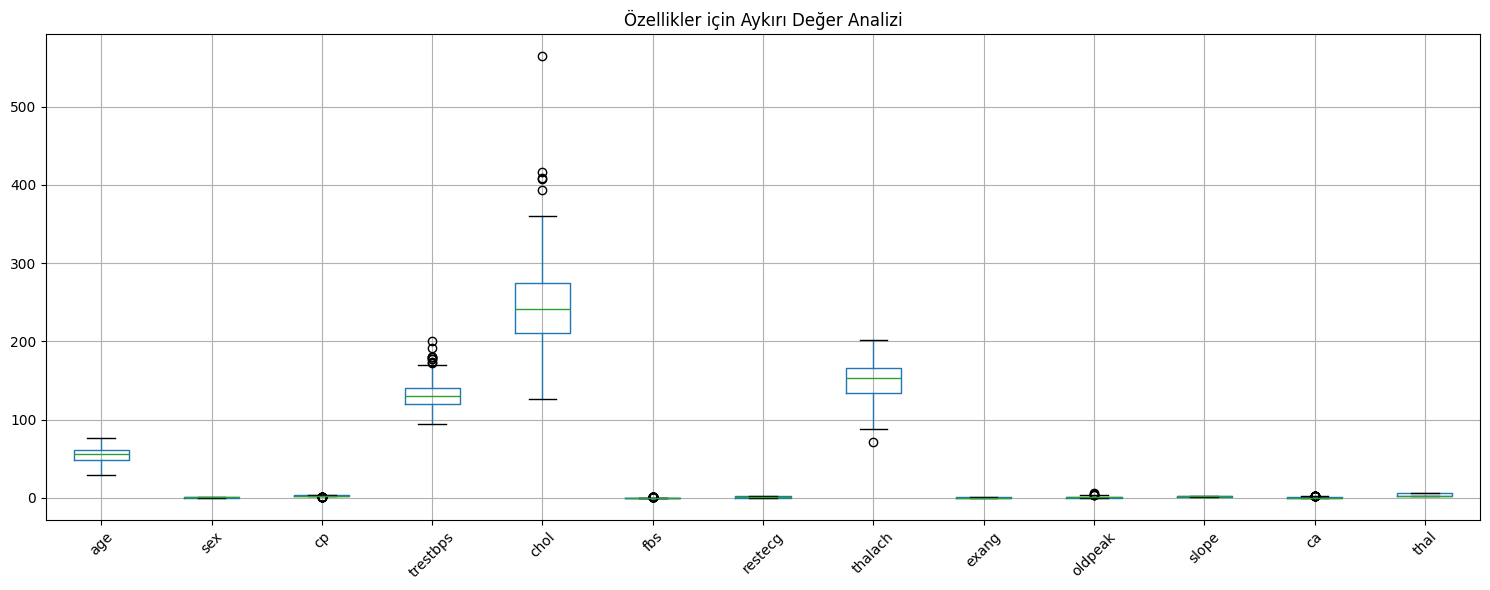


Özellik bazında aykırı değer sayıları:
age          0
sex          0
cp          23
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          20
thal         0
dtype: int64

Veri Dağılımı Analizi:


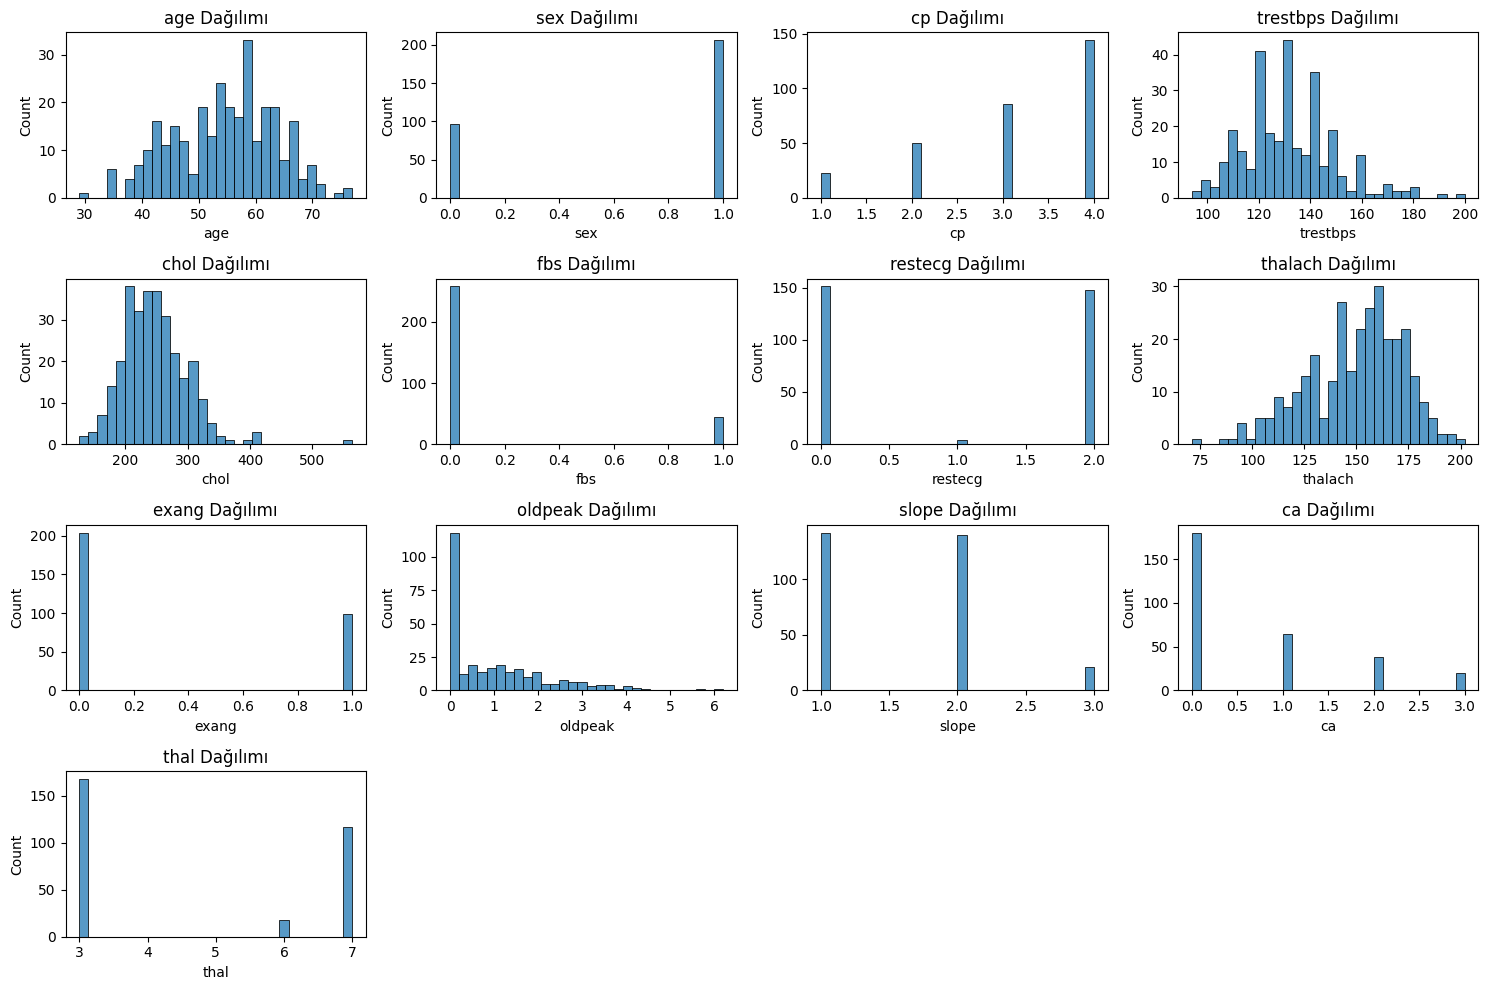


3. Veri Ön İşleme Aşaması:

Aykırı değerler temizleniyor...

Normalizasyon uygulanıyor...

Eğitim seti boyutu: (172, 13)
Test seti boyutu: (44, 13)

4. Model Eğitimi ve Değerlendirme Aşaması:
Eğitim verisi boyutları:
X_train: (172, 13)
y_train: (172,)

Sınıf dağılımı:
Sınıf 0.0: 97 örnek
Sınıf 1.0: 75 örnek
X shape: (172, 13), y shape: (172,)
Iterasyon 0, Loss: 0.6905
Iterasyon 100, Loss: 0.4729
Iterasyon 200, Loss: 0.4091
Iterasyon 300, Loss: 0.3811
Iterasyon 400, Loss: 0.3658
Iterasyon 500, Loss: 0.3564
Iterasyon 600, Loss: 0.3501
Iterasyon 700, Loss: 0.3457
Iterasyon 800, Loss: 0.3424
Iterasyon 900, Loss: 0.3399
Iterasyon 1000, Loss: 0.3380
Iterasyon 1100, Loss: 0.3365
Iterasyon 1200, Loss: 0.3352
Iterasyon 1300, Loss: 0.3342
Iterasyon 1400, Loss: 0.3333
Iterasyon 1500, Loss: 0.3326
Iterasyon 1600, Loss: 0.3320
Iterasyon 1700, Loss: 0.3315
Iterasyon 1800, Loss: 0.3310
Iterasyon 1900, Loss: 0.3307

Model Performans Metrikleri:
Doğruluk: 0.886

Sınıflandırma Raporu:
              pre

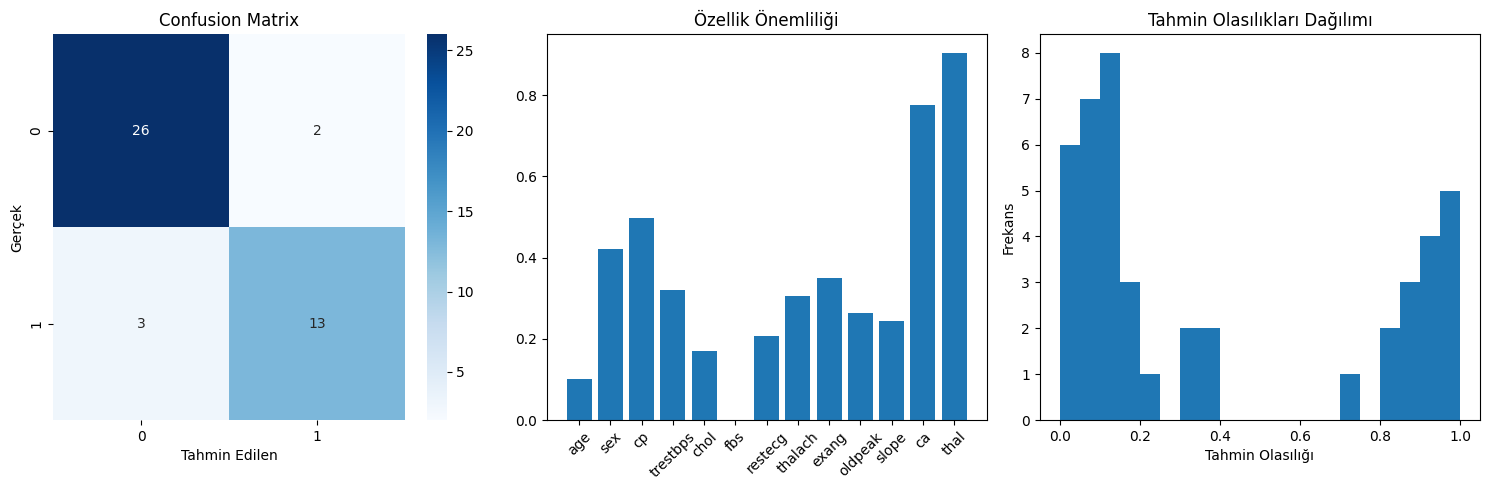


Model Performans Özeti:
--------------------------------------------------
Doğruluk (Accuracy): 0.886
Hassasiyet (Precision): 0.867
Duyarlılık (Recall): 0.812
F1 Skoru: 0.839

Özellik Önemlilik Sıralaması:
--------------------------------------------------
thal: 0.9040
ca: 0.7748
cp: 0.4968
sex: 0.4219
exang: 0.3486
trestbps: 0.3214
thalach: 0.3048
oldpeak: 0.2626
slope: 0.2441
restecg: 0.2071
chol: 0.1688
age: 0.1013
fbs: 0.0006


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

class VeriMadenciligiProjesi:
    def __init__(self):
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def veri_yukle(self):
        """Cleveland kalp hastalığı verisini yükle"""
        print("1. Veri Yükleme Aşaması:")

        try:
            # Cleveland verisini oku
            veri_yolu = "processed.cleveland.data"
            kolonlar = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

            # Veriyi pandas DataFrame'e yükle
            df = pd.read_csv(veri_yolu, names=kolonlar, na_values='?')

            # Eksik değerleri kontrol et ve temizle
            print("\nEksik değer sayıları:")
            print(df.isnull().sum())

            # Eksik değerleri medyan ile doldur
            for col in df.columns:
                if df[col].isnull().any():
                    median_value = df[col].median()
                    df[col] = df[col].fillna(median_value)

            # Target değişkenini ikili sınıflandırma için düzenle (0: Normal, 1: Hastalık)
            df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

            # Özellikleri ve hedef değişkeni ayır
            self.X = df.drop('target', axis=1)
            self.y = df['target']

            print(f"\nVeri boyutu: {self.X.shape}")
            print(f"Özellikler: {self.X.columns.tolist()}")
            print("\nSınıf dağılımı:")
            print(self.y.value_counts())

            # Veri özeti
            print("\nVeri özeti:")
            print(df.describe())

            return self

        except Exception as e:
            print(f"Veri yükleme sırasında hata oluştu: {str(e)}")
            raise

    def veri_analizi(self):
        """Veri keşfi ve analizi"""
        print("\n2. Veri Analizi Aşaması:")

        # Eksik değer analizi
        eksik_degerler = self.X.isnull().sum()
        print("\nEksik Değer Analizi:")
        print(eksik_degerler[eksik_degerler > 0] if eksik_degerler.sum() > 0 else "Eksik değer bulunmamaktadır.")

        # Aykırı değer analizi
        print("\nAykırı Değer Analizi:")
        self.aykiri_deger_analizi()

        # Veri dağılımı analizi
        print("\nVeri Dağılımı Analizi:")
        self.veri_dagilimi_goster()

        return self

    def aykiri_deger_analizi(self):
        """Aykırı değerleri tespit et ve görselleştir"""
        plt.figure(figsize=(15, 6))
        self.X.boxplot()
        plt.xticks(rotation=45)
        plt.title('Özellikler için Aykırı Değer Analizi')
        plt.tight_layout()
        plt.show()

        # IQR yöntemi ile aykırı değerleri tespit et
        Q1 = self.X.quantile(0.25)
        Q3 = self.X.quantile(0.75)
        IQR = Q3 - Q1
        aykirilar = ((self.X < (Q1 - 1.5 * IQR)) | (self.X > (Q3 + 1.5 * IQR))).sum()
        print("\nÖzellik bazında aykırı değer sayıları:")
        print(aykirilar)

    def veri_dagilimi_goster(self):
        """Özelliklerin dağılımını görselleştir"""
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(self.X.columns, 1):
            plt.subplot(4, 4, i)
            sns.histplot(data=self.X, x=col, bins=30)
            plt.title(f'{col} Dağılımı')
        plt.tight_layout()
        plt.show()

    def veri_on_isleme(self):
        """Veri ön işleme adımları"""
        print("\n3. Veri Ön İşleme Aşaması:")

        # Aykırı değerleri temizle
        print("\nAykırı değerler temizleniyor...")
        Q1 = self.X.quantile(0.25)
        Q3 = self.X.quantile(0.75)
        IQR = Q3 - Q1
        temiz_veri = ~((self.X < (Q1 - 1.5 * IQR)) | (self.X > (Q3 + 1.5 * IQR))).any(axis=1)
        self.X = self.X[temiz_veri]
        self.y = self.y[temiz_veri]

        # Min-Max Normalizasyonu (Kendi implementasyonumuz)
        print("\nNormalizasyon uygulanıyor...")
        self.X = self.min_max_normalizasyon(self.X)

        # Veri setini böl
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )
        print(f"\nEğitim seti boyutu: {self.X_train.shape}")
        print(f"Test seti boyutu: {self.X_test.shape}")

        return self

    def min_max_normalizasyon(self, X):
        """Kendi normalizasyon fonksiyonumuz"""
        X_norm = X.copy()
        for column in X.columns:
            min_val = X[column].min()
            max_val = X[column].max()
            X_norm[column] = (X[column] - min_val) / (max_val - min_val)
        return X_norm

    def model_egitimi(self):
        """Model eğitimi ve değerlendirme"""
        print("\n4. Model Eğitimi ve Değerlendirme Aşaması:")

        class LojistikRegresyon:
            def __init__(self, learning_rate=0.01, iterations=1000):
                self.lr = learning_rate
                self.iterations = iterations
                self.weights = None
                self.bias = None

            def sigmoid(self, z):
                z = np.clip(z, -500, 500)
                return 1 / (1 + np.exp(-z))

            def fit(self, X, y):
                print(f"X shape: {X.shape}, y shape: {y.shape}")

                n_samples, n_features = X.shape
                self.weights = np.random.randn(n_features) * 0.01
                self.bias = 0

                y = y.ravel()

                for i in range(self.iterations):
                    z = np.dot(X, self.weights) + self.bias
                    y_pred = self.sigmoid(z)

                    dw = np.dot(X.T, (y_pred - y)) / n_samples
                    db = np.sum(y_pred - y) / n_samples

                    dw += 0.01 * self.weights

                    self.weights = self.weights - self.lr * dw
                    self.bias = self.bias - self.lr * db

                    if i % 100 == 0:
                        l2_term = 0.01 * np.sum(self.weights**2) / 2
                        loss = -np.mean(y * np.log(y_pred + 1e-10) +
                                      (1 - y) * np.log(1 - y_pred + 1e-10)) + l2_term
                        print(f"Iterasyon {i}, Loss: {loss:.4f}")

            def predict_proba(self, X):
                z = np.dot(X, self.weights) + self.bias
                return self.sigmoid(z)

            def predict(self, X):
                probas = self.predict_proba(X)
                return (probas > 0.5).astype(int)

        # Veri hazırlığı
        print("Eğitim verisi boyutları:")
        print(f"X_train: {self.X_train.shape}")
        print(f"y_train: {self.y_train.shape}")

        X_train = self.X_train.values.astype(np.float64)
        y_train = self.y_train.values.astype(np.float64)
        X_test = self.X_test.values.astype(np.float64)
        y_test = self.y_test.values.astype(np.float64)

        # NaN değerleri kontrol et ve temizle
        X_train = np.nan_to_num(X_train, nan=0.0)
        X_test = np.nan_to_num(X_test, nan=0.0)

        # Veri standardizasyonu
        mean = np.nanmean(X_train, axis=0)
        std = np.nanstd(X_train, axis=0)
        X_train = (X_train - mean) / (std + 1e-8)
        X_test = (X_test - mean) / (std + 1e-8)

        # Sınıf dağılımı kontrolü
        unique, counts = np.unique(y_train, return_counts=True)
        print("\nSınıf dağılımı:")
        for u, c in zip(unique, counts):
            print(f"Sınıf {u}: {c} örnek")

        # Model eğitimi
        model = LojistikRegresyon(learning_rate=0.01, iterations=2000)
        model.fit(X_train, y_train)

        # Tahminler
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)

        y_test = y_test.ravel()

        # Model değerlendirme
        print("\nModel Performans Metrikleri:")
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Doğruluk: {accuracy:.3f}")

        print("\nSınıflandırma Raporu:")
        print(classification_report(y_test, y_pred, zero_division=1))

        # Görselleştirmeler
        plt.figure(figsize=(15, 5))

        # 1. Confusion Matrix
        plt.subplot(131)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Tahmin Edilen')
        plt.ylabel('Gerçek')

        # 2. Özellik Önemliliği
        plt.subplot(132)
        feature_importance = np.abs(model.weights)
        feature_names = self.X_train.columns

        # NaN kontrolü
        feature_importance = np.nan_to_num(feature_importance, nan=0.0)

        plt.bar(range(len(feature_importance)), feature_importance)
        plt.xticks(range(len(feature_importance)), feature_names, rotation=45)
        plt.title('Özellik Önemliliği')

        # 3. Tahmin Dağılımı (güvenli versiyon)
        plt.subplot(133)
        valid_probs = y_pred_proba[~np.isnan(y_pred_proba)]
        if len(valid_probs) > 0:
            plt.hist(valid_probs, bins=20, range=(0, 1))
            plt.title('Tahmin Olasılıkları Dağılımı')
            plt.xlabel('Tahmin Olasılığı')
            plt.ylabel('Frekans')
        else:
            plt.text(0.5, 0.5, 'Geçerli tahmin yok', ha='center')

        plt.tight_layout()
        plt.show()

        # Model Performans Özeti
        print("\nModel Performans Özeti:")
        print("-" * 50)
        print(f"Doğruluk (Accuracy): {accuracy:.3f}")

        precision = precision_score(y_test, y_pred, zero_division=1)
        recall = recall_score(y_test, y_pred, zero_division=1)
        f1 = f1_score(y_test, y_pred, zero_division=1)

        print(f"Hassasiyet (Precision): {precision:.3f}")
        print(f"Duyarlılık (Recall): {recall:.3f}")
        print(f"F1 Skoru: {f1:.3f}")

        # Özellik önemlilik sıralaması
        feature_importance_dict = dict(zip(feature_names, feature_importance))
        sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

        print("\nÖzellik Önemlilik Sıralaması:")
        print("-" * 50)
        for feature, importance in sorted_features:
            print(f"{feature}: {importance:.4f}")

        return self

# Projeyi çalıştır
if __name__ == "__main__":
    proje = VeriMadenciligiProjesi()
    (proje
     .veri_yukle()
     .veri_analizi()
     .veri_on_isleme()
     .model_egitimi())